# Visualization

## References




[Online Help](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

[cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting)

## Learning Outcomes:


* Basic Plotting: plot
* Other Plots
* Plotting with Missing Data
* Plotting Tools
* Plot Formatting
* Plotting directly with matplotlib
* Trellis plotting interface

In [1]:
import pandas as pd
import numpy as np
print("Pandas version : {}".format(pd.__version__))
print("Numpy version : {}".format(np.__version__))

Pandas version : 0.22.0
Numpy version : 1.14.3


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
np.random.seed(seed=123456)

## Basic Plotting: plot

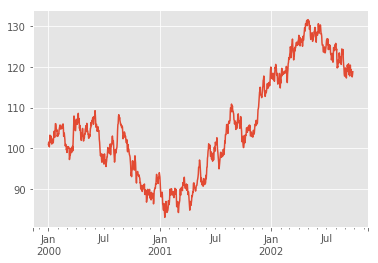

In [9]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum() + 100
ts.plot();

If the index consists of dates, it calls **gcf().autofmt_xdate()** to try to format the x-axis nicely as per above.

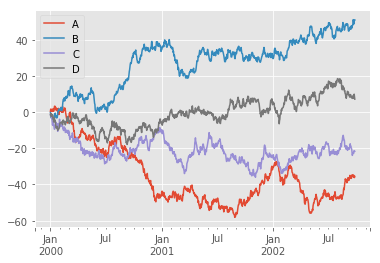

In [11]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); 
df.plot();

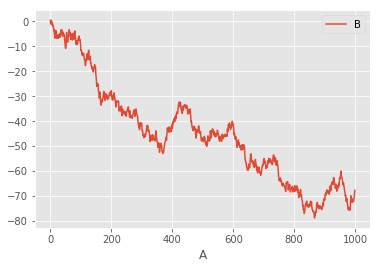

In [12]:
np.random.seed(seed=123456)
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

## Other Plots

### Bar plots

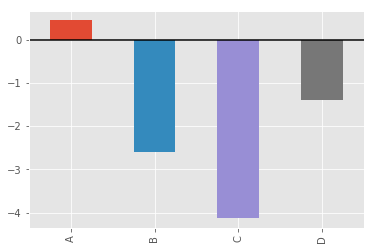

In [16]:
plt.figure();
df.iloc[5].plot(kind='bar'); 
plt.axhline(0, color='k');

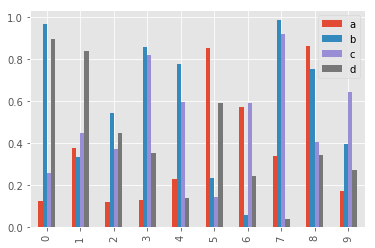

In [17]:
np.random.seed(seed=123456)
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

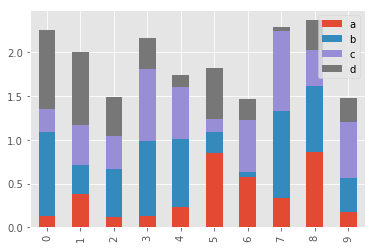

In [18]:
df2.plot.bar(stacked=True);

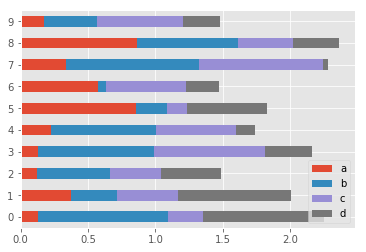

In [19]:
df2.plot.barh(stacked=True);

### Histograms

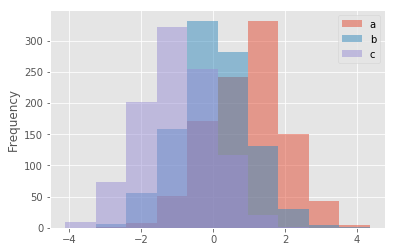

In [23]:
np.random.seed(seed=123456)
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(alpha=0.5);

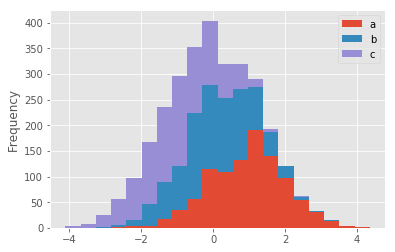

In [26]:
#plt.figure();
df4.plot.hist(stacked=True, bins=20);

In [32]:
df.head()

,A,B,C,D
2000-01-01,0.469112,-0.282863,-1.509059,-1.135632
2000-01-02,1.681224,-0.456078,-1.389850,-2.179868
2000-01-03,0.819375,-2.560647,-1.884779,-1.108065
2000-01-04,1.540931,-3.267418,-2.924354,-0.836205
2000-01-05,1.115958,-2.700398,-2.648122,-1.923605


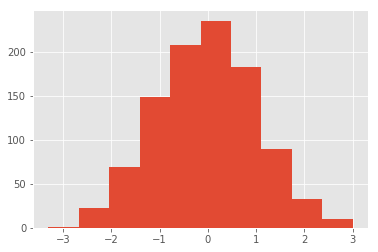

In [28]:
#plt.figure();
df['A'].diff().hist();

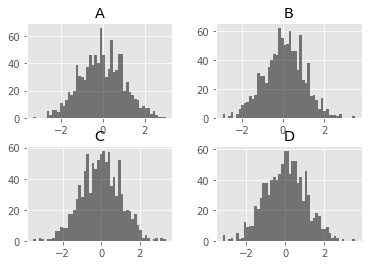

In [31]:
#plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50);

### Box Plots

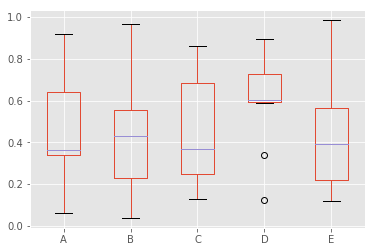

In [34]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box();

In [37]:
df.plot.box?

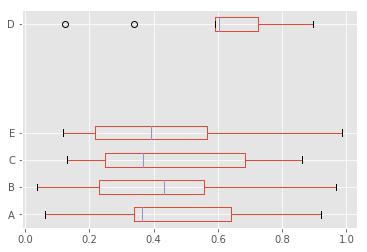

In [41]:
df.plot.box(vert=False, positions=[3, 4, 5, 10, 6]);

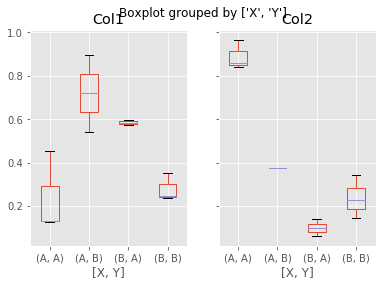

In [46]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
#plt.figure();
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y']);

### Area Plot

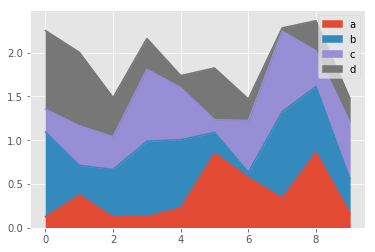

In [47]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

### Scatter Plot

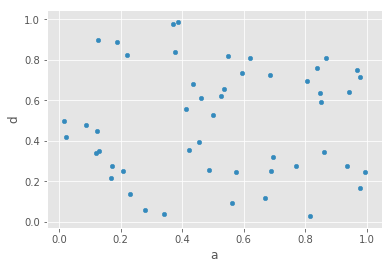

In [51]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='d');

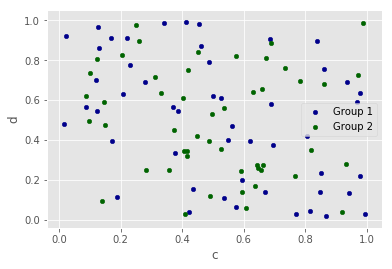

In [52]:
np.random.seed(seed=123456)
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

In [55]:
df.head()

,a,b,c,d
0,0.126970,0.966718,0.260476,0.897237
1,0.376750,0.336222,0.451376,0.840255
2,0.123102,0.543026,0.373012,0.447997
3,0.129441,0.859879,0.820388,0.352054
4,0.228887,0.776784,0.594784,0.137554


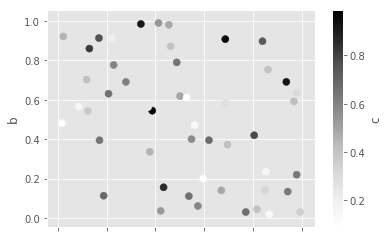

In [53]:
df.plot.scatter(x='a', y='b', c='c', s=50); 
# The keyword c may be given as the name of a column to provide colors for each point:

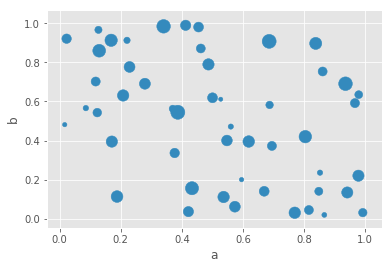

In [58]:
df.plot.scatter(x='a', y='b', s=df['c']*200); 
# using a dataframe column values as bubble size.

### Hexagonal Bin Plot

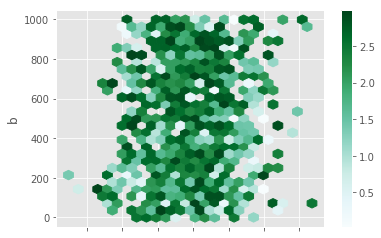

In [60]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,
                gridsize=25);

### Pie plot

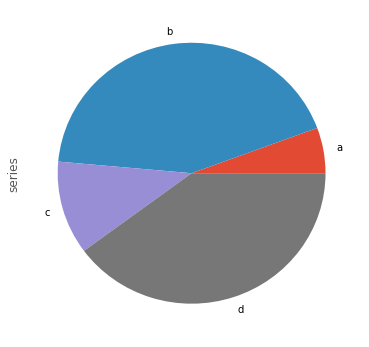

In [62]:
np.random.seed(seed=123456)
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6));

## Plotting with Missing Data


Pandas tries to be pragmatic about plotting DataFrames or Series that contain missing data. Missing values are dropped, left out, or filled depending on the plot type.

## Plotting Tools

### Scatter Matrix Plot

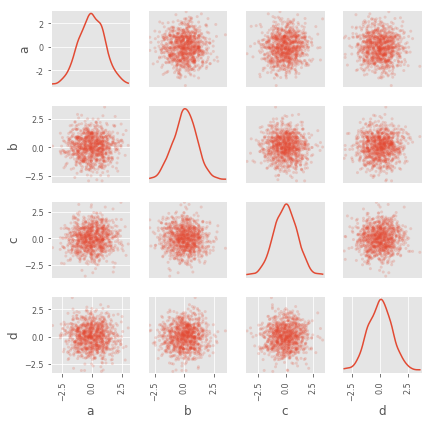

In [65]:
np.random.seed(seed=123456)
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.tight_layout()

### Density Plot

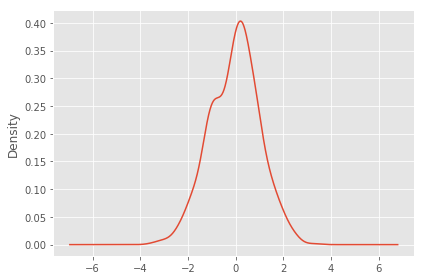

In [66]:
np.random.seed(seed=123456)
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()
plt.tight_layout()

### Autocorrelation Plot


Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

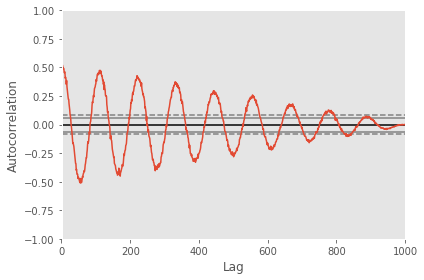

In [67]:
np.random.seed(seed=123456)
from pandas.plotting import autocorrelation_plot
plt.figure()
data = pd.Series(0.7 * np.random.rand(1000) +
                 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)
plt.tight_layout()

### Bootstrap Plot


Bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean, median, midrange, etc. A random subset of a specified size is selected from a data set, the statistic in question is computed for this subset and the process is repeated a specified number of times. Resulting plots and histograms are what constitutes the bootstrap plot.

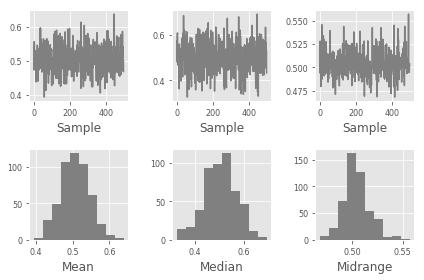

In [68]:
np.random.seed(seed=123456)
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='grey')
plt.tight_layout()

## Plot Formatting


Most plotting methods have a set of keyword arguments that control the layout and formatting of the returned plot:

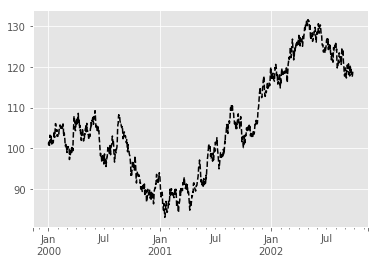

In [69]:
plt.figure(); ts.plot(style='k--', label='Series');

For each kind of plot (e.g. *line, bar, scatter*) any additional arguments keywords are passed along to the corresponding matplotlib function (**ax.plot(), ax.bar(), ax.scatter()**). These can be used to control additional styling, beyond what pandas provides.

### Controlling the Legend

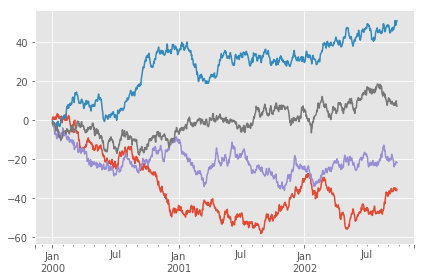

In [72]:
np.random.seed(seed=123456)
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=False)
plt.tight_layout()

### Scales

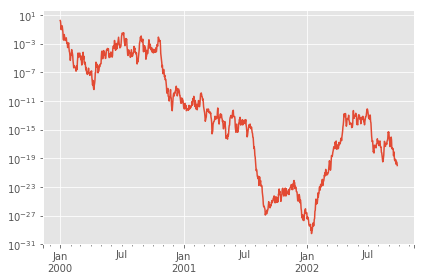

In [73]:
np.random.seed(seed=123456)
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)
plt.tight_layout()

### Plotting on a Secondary Y-axis

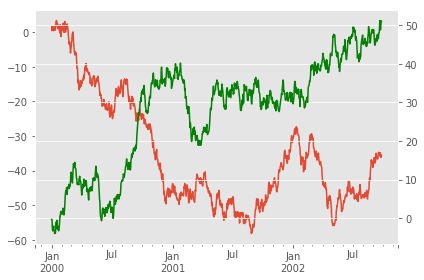

In [74]:
df.A.plot()
df.B.plot(secondary_y=True, style='g')
plt.tight_layout()

### Subplots

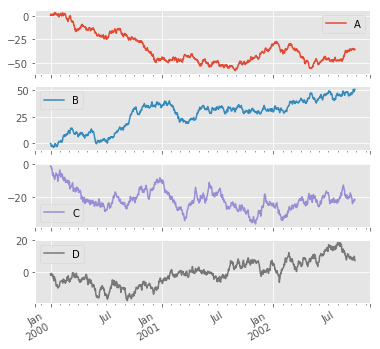

In [75]:
df.plot(subplots=True, figsize=(6, 6));

### Using Layout and Targeting Multiple Axes

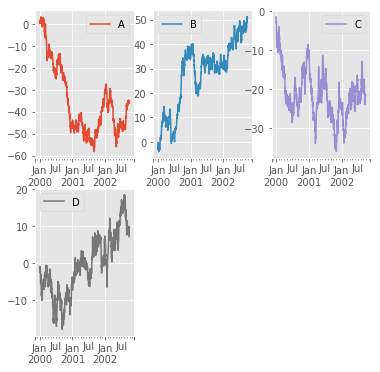

In [78]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False,
       sharey=False);

## Plotting directly with matplotlib


In some situations it may still be preferable or necessary to prepare plots directly with matplotlib, for instance when a certain type of plot or customization is not (yet) supported by pandas. Series and DataFrame objects behave like arrays and can therefore be passed directly to matplotlib functions without explicit casts.

pandas also automatically registers formatters and locators that recognize date indices, thereby extending date and time support to practically all plot types available in matplotlib. Although this formatting does not provide the same level of refinement you would get when plotting via pandas, it can be faster when plotting a large number of points.

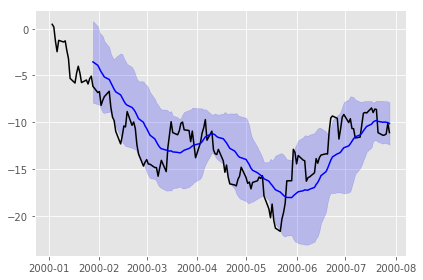

In [79]:
np.random.seed(seed=123456)
price = pd.Series(np.random.randn(150).cumsum(),
                  index=pd.date_range('2000-1-1', periods=150, freq='B'))

ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)
plt.tight_layout()

# Reference

[Interesting Read](https://priceonomics.com/hadley-wickham-the-man-who-revolutionized-r/)

***